## Nombres: Cristhian Wiki Sánchez Sauñe

# Pregunta 1
Write a program that takes the four consecutive vertices of a
quadrilateral and determines whether the polygon is convex or not.

In [2]:
def CrossProduct(A):
    """
    Función para hallar el producto cruz
    """

    # Calculamos la componente X del vector A[1]A[0]
    X1 = A[1][0] - A[0][0]

    # Calculamos la componente Y del vector A[1]A[0]
    Y1 = A[1][1] - A[0][1]

    # Calculamos la componente X del vector A[2]A[0]
    X2 = A[2][0] - A[0][0]

    # Calculamos la componente Y del vector A[2]A[0]
    Y2 = A[2][1] - A[0][1]

    # Returnamos el producto cruz
    return X1 * Y2 - Y1 * X2


def isConvex(points):
    """
    Función para validar si un polígono es convexo o no
    """

    # cantidad de aristas
    N = len(points)

    # dirección del producto cruz de las previas aristas
    # recorridas
    prev = 0

    # dirección del producto cruz de las actuales aristas
    # recorridas
    curr = 0

    # recorrido sobre las aristas
    for i in range(N):
        # Almacenamos las tres aristas adyacentes del polígono
        temp = [points[i], points[(i + 1) % N], points[(i + 2) % N]]

        # Actualizamos curr
        curr = CrossProduct(temp)

        # Si curr es diferente de 0
        if curr != 0:
            # Si la dirección del producto cruz de todos las
            # aristas adyacentes no es la misma
            if curr * prev < 0:
                return False
        else:
            # Actualizamos curr
            prev = curr
    return True


if __name__ == "__main__":

    points = [[0, 0], [0, 1], [1, 1], [1, 0]]
    if isConvex(points):
        print("El poligono ES convexo")
    else:
        print("El poligono NO ES convexo")


El poligono ES convexo


# Pregunta 4

Create a program to construct a uniform quadratic B-spline
using the control points (−1, 0), (1, 4), (3, −2), and (4, 3) and show
the parametric equation of the curve. Find the point on the curve at
t = 3.5.

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

In [4]:
P = np.array([[-1, 0], [1, 4], [3.0, -2], [4, 3]])

# B_Spline
def N(i, k, t, t_val, T):
    """
    Parameters
    ----------
    k: b-spline order, degre of polynomial is k - 1
    T: vector node
    """
    if k == 1:
        return 1 if T[i] <= t_val < T[i+1] else 0
    else:
        return (t - T[i])/(T[i+k-1] - T[i])*N(i, k-1, t, t_val, T) + (T[i+k] - t)/(T[i+k] - T[i+1])*N(i+1, k-1, t, t_val, T)

def uniform_b_spline(t, t_val, k, T, points):
    sk = 0
    n = len(points)
    for i in range(n):
        print(f"N_{i},{k - 1} =", sp.expand(N(i, k, t, t_val, T)))
        sk += points[i]*N(i, k, t, t_val, T)
    return sk
    
sp.init_printing(use_unicode=True)
t = sp.symbols('t')

In [5]:
k = 3          # degree 2, order 3
n = len(P)     # 4 points
T = [i for i in range(n + k)]

print("Two intervals\n-------------")
for t_val in range(k - 1, n):
    print(f"t in [{t_val}, {t_val + 1}]")

    b_spline = uniform_b_spline(t, t_val, k, T, P)
    x = sp.expand(b_spline[0])
    y = sp.expand(b_spline[1])

    print("Ecuación paramétrica")
    print("x(t) =", x)
    print("y(t) =", y)
    print()

Two intervals
-------------
t in [2, 3]
N_0,2 = t**2/2 - 3*t + 9/2
N_1,2 = -t**2 + 5*t - 11/2
N_2,2 = t**2/2 - 2*t + 2
N_3,2 = 0
Ecuación paramétrica
x(t) = 2.0*t - 4.0
y(t) = -5.0*t**2 + 24.0*t - 26.0

t in [3, 4]
N_0,2 = 0
N_1,2 = t**2/2 - 4*t + 8
N_2,2 = -t**2 + 7*t - 23/2
N_3,2 = t**2/2 - 3*t + 9/2
Ecuación paramétrica
x(t) = -0.5*t**2 + 5.0*t - 8.5
y(t) = 5.5*t**2 - 39.0*t + 68.5



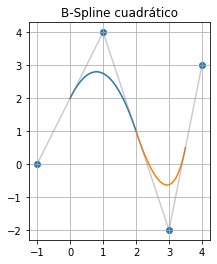

In [6]:
t1 = np.linspace(2, 3, 100)
x1 = [2.0*t - 4.0 for t in t1]
y1 = [-5.0*t**2 + 24.0*t - 26.0 for t in t1]

t2 = np.linspace(3, 4, 100)
x2 = [-0.5*t**2 + 5.0*t - 8.5 for t in t2]
y2 = [5.5*t**2 - 39.0*t + 68.5 for t in t2]

plt.title('B-Spline cuadrático')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.scatter(P[:, 0], P[:, 1])
plt.plot(P[:, 0], P[:, 1], '-', c='gray', alpha=0.4)
plt.axis('scaled')
plt.grid(True)
plt.show()

In [7]:
t_eval = 3.5
x_eval = -0.5*t_eval**2 + 5.0*t_eval - 8.5
y_eval = 5.5*t_eval**2 - 39.0*t_eval + 68.5

print(f"En t = {t_eval}, las coordenadas son ({x_eval}, {y_eval})")

En t = 3.5, las coordenadas son (2.875, -0.625)


# Pregunta 5


In [75]:
def deBoor(k, x, t, c, p):
    """
    Evaluates S(x).

    Args
    ----
    k: index of knot interval that contains x
    x: position
    t: array of knot positions, needs to be padded as described above
    c: array of control points
    p: degree of B-spline
    """
    d = [c[j + k - p] for j in range(0, p+1)]
  

    for r in range(1, p+1):
        for j in range(p, r-1, -1):
            #print(j, end="  ")
            alpha = (x - t[j+k-p]) / (t[j+1+k-r] - t[j+k-p])
            '''
            print(d[j-1 + 1], end=" ")
            print(d[j + 1] )
            print(d)
            '''
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]
            #print(d)

    return d[p]

In [76]:
knots = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
P = np.array([[-1, 0], [1, 4], [3.0, -2], [4, 3]])


print(deBoor(3, 3.5, knots, P[::-1], 3))

[   4904.16666667 -109040.16666667]


In [ ]:
'''
def boor(i, k=2, t, array):
    arrayAux = array.copy()
    idx = array.shape[0] - 1

    for j in range(k+1):
      for 
        alpha = (t - i) / (k - j + 1)
        arrayAux[i] = (1- alpha)*array[i-j] + alpha*array[i]

    return arrayAux[i]
'''